<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
This notebook plots LCMS for Y622 +/- CDP-choline

</div>



In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
os.sys.path.append('/Users/djuna/Documents/ABCA7lof2/')
from ABCA7lof2.lcms_funcs import return_stats, plot_volcano, plot_pca, count_unsaturations, count_carbons, plot_lfcs, plot_carbon_distributions, plot_class_counts, plot_with_blank, classify_fatty_acid_length, classify_unsaturation
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# load libraries
output_dir = "../../LCMS/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

urls = ['https://storage.googleapis.com/abca7lof/LCMS/SUB14737/5041.SUB14737_LipidXData.csv']

for url in urls:
    local_filename = os.path.join(output_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, local_filename)
    print("Download completed!")


Download completed!


In [2]:
output_dir = "../../../LCMS/"

# load data
data = pd.read_csv(local_filename)
data['score'] = -np.log10(data['p_value[s2-over-s1]']) * np.sign(data['log_ratio[s2-over-s1]'])
data.index = data['name']

# load lipid key
key = pd.read_csv(os.path.join(output_dir, 'LipidKey.csv'))
dictionary = dict(zip(key['Key'], key['Class']))

# sample key 
sample_dictionary = {'s1':'H2O',
                     's2':'CDP-Choline',
                     's3':'Extraction blank',
                     'c]':'Solvent blank'}

palette = {
    'Sphingolipids':'#1DC9A4',
    'Neutral lipids':'#E3120B',
    'Phospholipids':'#475ED1',
    'Fatty acyl and other lipids':'#F97A1F', 
    'Neutral glycerolipid':'#E3120B',	
    'Steroid':'#F9C31F', 
    'Glycoglycerolipids':'blue'
}

key = pd.read_csv(os.path.join(output_dir, 'LipidKey.csv'))
dictionary = dict(zip(key['Key'], key['Class']))


In [3]:
# annotate the classes
data['group'] = data['class'].map(dictionary)
data['class'].unique()

# get areas
areas = data[[col for col in data.columns if col.startswith('area[')]]
names = np.array([x.split('[')[1][:2] for x in areas.columns])
areas_columns = np.array([sample_dictionary[x] for x in names])

# subtract blank
areas_no_blank = areas.iloc[:,areas_columns!='Extraction blank']
ext_blank = areas.iloc[:, areas_columns == 'Extraction blank'].squeeze()
result_df = areas_no_blank.subtract(ext_blank, axis=0)

# This creates a boolean mask that is True for rows where all values are > 0.
mask = (((result_df > 0).sum(axis=1))/result_df.shape[1])>0.5

# Use the mask to select rows from result_df
selected_rows = result_df[mask]
names_sele = areas_columns[:-1]
selected_rows

,area[s1-1],area[s1-2],area[s1-3],area[s1-4],area[s1-5],area[s2-1],area[s2-2],area[s2-3],area[s2-4],area[s2-5]
name,,,,,,,,,,
Cer(d16:0_16:0)+H_53.21,1.291548e+08,2.082639e+09,1.047403e+09,1.204285e+09,1.484173e+09,1.191799e+09,8.081646e+08,2.675930e+08,1.519411e+08,-1.240906e+07
Cer(d18:0_14:0)+H_30.02,-2.230574e+07,2.989402e+07,1.036671e+07,5.917017e+06,1.255495e+07,5.265131e+07,1.381670e+07,-4.061718e+06,-1.189815e+07,-1.348757e+07
Cer(d18:0_16:0)+H_41.29,3.777461e+06,2.445627e+08,1.842961e+08,1.203919e+08,1.629137e+08,2.752470e+08,1.176890e+08,9.262237e+07,8.266890e+07,3.745029e+07
Cer(d18:1_14:0)+H-H2O_39.3,1.012504e+07,5.294060e+07,6.038948e+07,4.926018e+07,3.656749e+07,1.051513e+08,6.270710e+07,3.633313e+07,2.377805e+07,2.450806e+07
Cer(d18:1_14:0)+H_39.3,5.424847e+07,2.411968e+08,2.244891e+08,1.751475e+08,1.777732e+08,4.536264e+08,2.373501e+08,1.617999e+08,9.993923e+07,8.778775e+07
...,...,...,...,...,...,...,...,...,...,...
WE(3:0_18:0)+H_33.67,4.274510e+08,1.221471e+09,1.046749e+09,7.085614e+08,7.230943e+08,8.592389e+08,7.301977e+08,-8.053913e+07,9.923040e+07,6.067122e+07
WE(4:0_12:0)+H_31.23,2.236256e+08,1.691443e+09,1.001584e+09,6.640387e+08,8.897843e+08,1.215039e+09,8.823612e+08,-2.310744e+08,-2.700127e+07,-4.978712e+07
WE(5:0_13:0)+H_33.66,5.762714e+08,1.753271e+09,1.453932e+09,9.669188e+08,9.953758e+08,1.266369e+09,1.017352e+09,-1.365398e+08,1.417806e+08,7.968970e+07


In [4]:
# compute stats
stats = return_stats(selected_rows, names_sele,  'H2O', 'CDP-Choline', equal_var=True)
stats['name'] = stats.index
stats['grp'] = [dictionary[x.split('(')[0]] for x in stats.index]
# Drop rows where fold change is NaN
stats = stats.dropna(subset=['log2_fold_change'])
stats.sort_values(by='p_value')[:20]
stats['cat'] = 'other'


/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:33: RuntimeWarning: invalid value encountered in log2
  log2_fold_change = np.log2(mean_group2 / mean_group1) if mean_group1 != 0 else np.nan


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na o

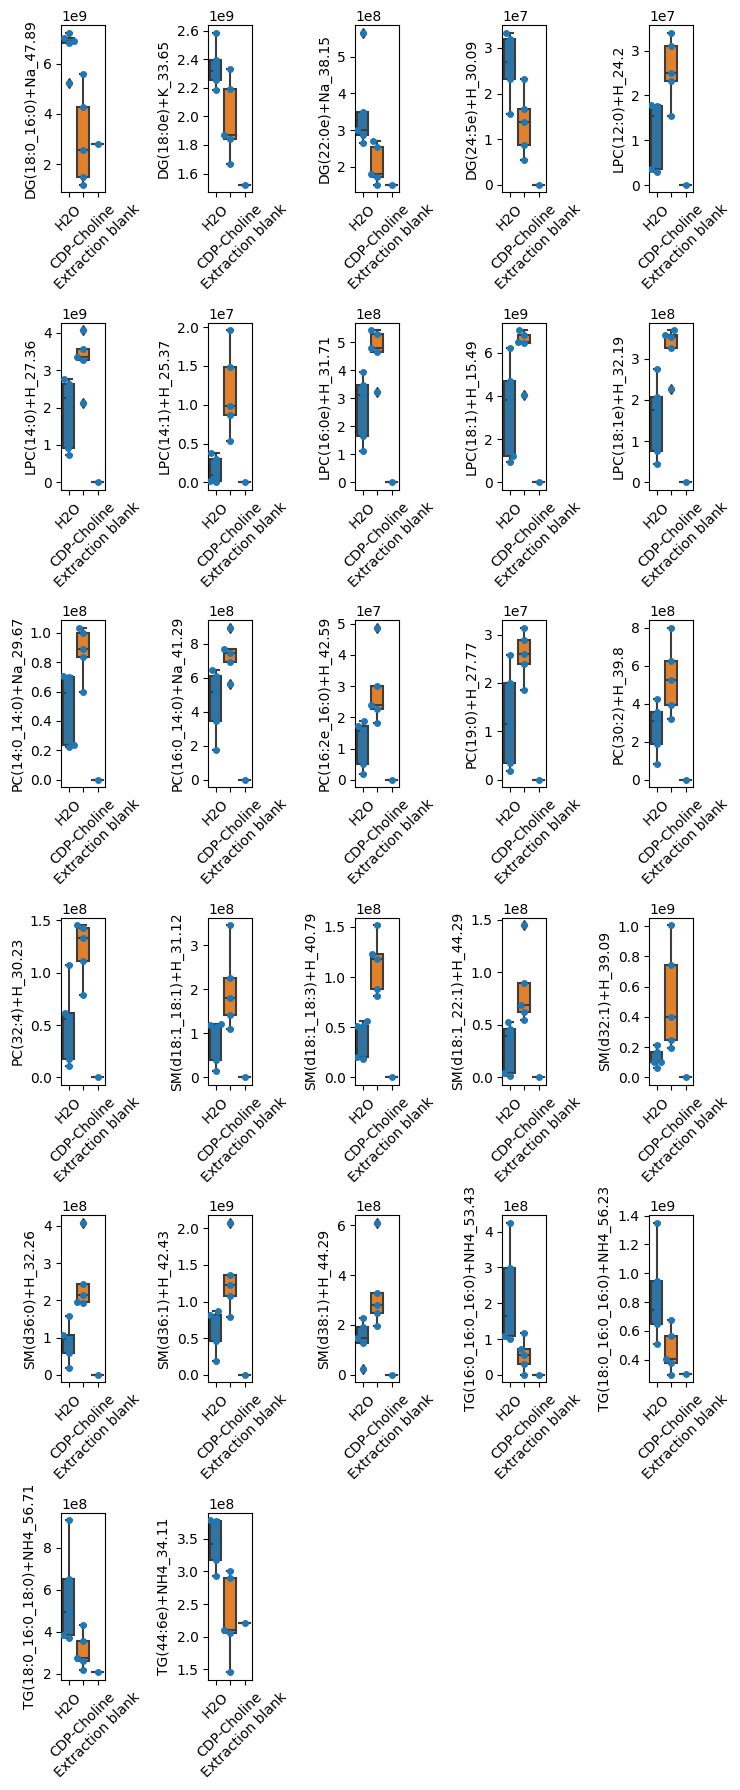

In [5]:
# show sig lipids with blanks
areas_sub = areas.loc[stats[stats['p_value']<0.05].index]
areas_sub.columns = areas_columns
areas_sub = areas_sub.T
areas_sub['grp'] = areas_sub.index
plot_with_blank(areas_sub)

/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:54: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['cat'][(data[lfc_col]<0) & (data[pval_col]<0.05)] = 'down'
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:54: SettingWi

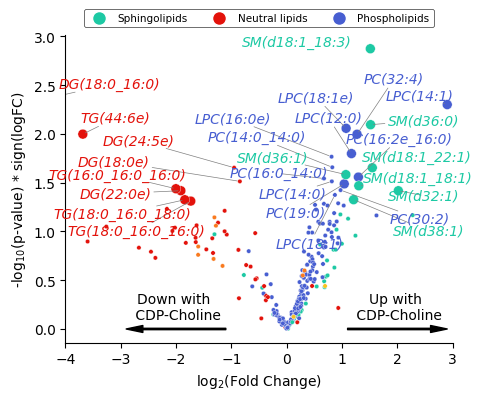

In [7]:
plot_volcano('p_value', 'name', 'grp', 'log2_fold_change', stats, palette)

plt.xlabel('log$_{2}$(Fold Change)')
plt.ylabel('-log$_{10}$(p-value) * sign(logFC)')

plt.annotate('', xy=(3,0), xytext=(1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(2, .1, 'Up with \n CDP-Choline', ha='center', fontsize=10)

plt.annotate('', xy=(-3,0), xytext=(-1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(-2, .1, 'Down with \n CDP-Choline', ha='center', fontsize=10)

plt.xlim(-4,3)

labels = [
    'Sphingolipids', 
    'Neutral lipids', 
    'Phospholipids'
]

handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)
plt.savefig('../../../paper/main_plots/volcano_all_species_choline.png', dpi=300, bbox_inches='tight')


In [6]:
names_sele

array(['H2O', 'H2O', 'H2O', 'H2O', 'H2O', 'CDP-Choline', 'CDP-Choline',
       'CDP-Choline', 'CDP-Choline', 'CDP-Choline'], dtype='<U16')

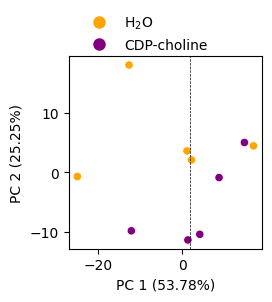

In [8]:
plot_pca(selected_rows, names_sele, palette={'H2O':'orange', 'CDP-Choline' : 'purple'}, draw_median=True)

# Add a custom legend based on marker type
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
        markerfacecolor='orange', markersize=10,linestyle='None', label='H$_2$O'),
    Line2D([0], [0], marker='o', markerfacecolor='purple',color='w',
        markersize=10, linestyle='None', label='CDP-choline')
]
plt.legend(handles=legend_elements, title='', bbox_to_anchor=(.4, 1.28), loc='upper center', frameon=False)

/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

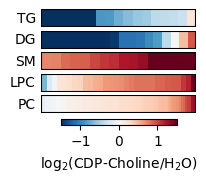

In [9]:
stats['class'] = [x.split('(')[0] for x in stats.index]
heatmap_data_list = [
    stats[stats['class'] == 'TG'],
    stats[stats['class'] == 'DG'],
    stats[stats['class'] == 'SM'],
    stats[stats['class'] == 'LPC'],
    stats[stats['class'] == 'PC']
]
cbar = plot_lfcs(heatmap_data_list, 'log2_fold_change')
cbar.set_label('log$_{2}$(CDP-Choline/H$_{2}$O)')

In [10]:
stats['carbons'] = stats['name'].apply(count_carbons)
stats['unsaturations'] = stats['name'].apply(count_unsaturations)


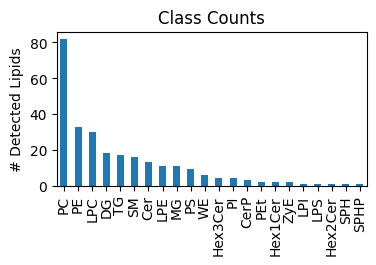

In [11]:
plt.figure(figsize=(4,2))
plot_class_counts(stats)

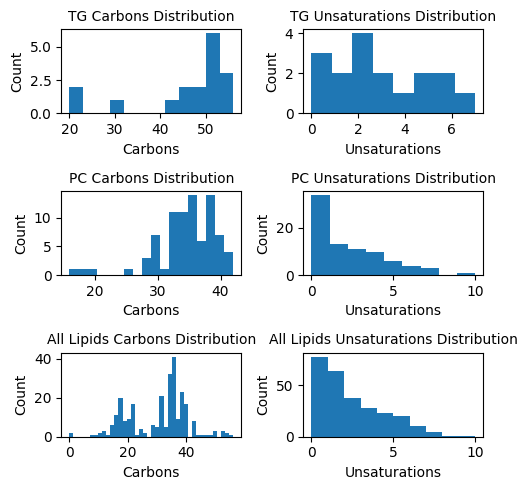

In [12]:
plot_carbon_distributions(stats)

In [9]:
# by group stats
groups = [x.split('(')[0] for x in selected_rows.index]
by_grp = selected_rows.groupby(groups).sum()
by_grp_stats = return_stats(by_grp, names_sele,  'H2O', 'CDP-Choline', equal_var=True)

by_grp_stats['score'] = -1*np.log10(by_grp_stats['p_value']) * np.sign(by_grp_stats['log2_fold_change'])
by_grp_stats.sort_values(by='p_value')

,t_stat,p_value,log2_fold_change,fdr_corrected_p_value,score
MG,-2.757958,0.024753,-2.535170,0.389386,-1.606377
TG,-2.260789,0.053656,-1.071939,0.389386,-1.270380
DG,-2.183927,0.060491,-2.392496,0.389386,-1.218309
LPS,1.975425,0.083639,0.776679,0.389386,1.077593
SM,1.813605,0.107297,0.969671,0.389386,0.969411
LPC,1.736870,0.120617,0.552179,0.389386,0.918592
WE,-1.719202,0.123896,-1.340315,0.389386,-0.906944
LPI,1.519738,0.167064,0.576888,0.459425,0.777118
PEt,1.230940,0.253305,0.302344,0.532682,0.596356
PS,1.208550,0.261343,0.428616,0.532682,0.582790


In [10]:
# classify fatty acids in TGs
selected_rows_TG = selected_rows[np.array(groups)=='TG']

carbon_counts_classified = np.array([classify_fatty_acid_length(count_carbons(x)/3) for x in selected_rows_TG.index])

by_grp = selected_rows_TG.groupby(carbon_counts_classified).sum()
by_grp_stats = return_stats(by_grp, names_sele,  'H2O', 'CDP-Choline')
by_grp_stats



/Users/djuna/Documents/ABCA7lof2/ABCA7lof2/lcms_funcs.py:33: RuntimeWarning: invalid value encountered in log2
  log2_fold_change = np.log2(mean_group2 / mean_group1) if mean_group1 != 0 else np.nan


,t_stat,p_value,log2_fold_change,fdr_corrected_p_value
LCFA,-1.595450,0.155827,-0.727797,0.155827
MCFA,-2.106687,0.086046,NaN,0.155827


In [11]:
# classify fatty acids in PCs
selected_rows_PC = selected_rows[np.array(groups)=='PC']

carbon_counts_classified = np.array([classify_unsaturation(count_unsaturations(x)) for x in selected_rows_PC.index])

by_grp = selected_rows_PC.groupby(carbon_counts_classified).sum()
by_grp_stats = return_stats(by_grp, names_sele,  'H2O', 'CDP-Choline')
by_grp_stats



,t_stat,p_value,log2_fold_change,fdr_corrected_p_value
MFA,0.936319,0.391122,0.268417,0.391122
PUFA,0.988075,0.364674,0.284419,0.391122
UFA,0.984925,0.363785,0.215329,0.391122


In [ ]:
# # Example: list of dataframes for each heatmap (replace with your actual dataframes)


# def plot_lfcs(heatmap_data_list, stats, lfc_column):
#     # Number of heatmaps
#     n_heatmaps = len(heatmap_data_list)

#     # Create a figure with n_heatmaps rows and 1 column
#     fig, axes = plt.subplots(nrows=n_heatmaps, ncols=1, figsize=(2, n_heatmaps * .3))

#     # If there's only one heatmap, ensure axes is iterable
#     if n_heatmaps == 1:
#         axes = [axes]

#     # Loop over each dataframe and axis
#     for ax, df in zip(axes, heatmap_data_list):
#         # Sort the data by the column of interest
#         sorted_data = stats[[lfc_column]].sort_values(by=lfc_column)
#         # Transpose so the heatmap is horizontal (one row rather than one column)
#         sorted_data = sorted_data.T
        
#         # Plot the horizontal heatmap on the given axis
#         im = sns.heatmap(sorted_data, annot=False, cmap='RdBu_r', vmin=-1.5, vmax=1.5,
#                     cbar_kws={'label': lfc_column}, ax=ax, cbar=False)
        
#         # Set a title for the heatmap (displayed above each plot)
#         ax.set_title('')
#         ax.set_ylabel('')
#         ax.set_xlabel('')
#         # Optionally remove x-axis tick labels if they correspond to species names or similar unwanted labels
#         ax.set_xticklabels([])
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
        
#         rect = Rectangle((0, 0), 1, 1, transform=ax.transAxes,
#                         fill=False, color="black", linewidth=1.5)
#         ax.add_patch(rect)
#         if df['class'][0] == 'MG':
#             ax.set_title('Neutral lipids', fontsize=10)
#         # if df['class'][0] == 'SM':
#         #     ax.set_title('Phospholipids', fontsize=10)
        
#     plt.subplots_adjust(hspace=0.1)

#     if n_heatmaps >= 4:
#         # Get the current position of the 4th subplot
#         pos = axes[3].get_position()
#         # Increase the vertical gap by shifting the 4th subplot downward.
#         # For example, subtracting an extra 0.4 from the y0 position.
#         new_pos = [pos.x0, pos.y0 - 0.4, pos.width, pos.height]
#         axes[3].set_position(new_pos)

#         axes[3].text(.5, 3.5, 'Phospholipids',fontsize=10,
#                     transform=axes[3].transAxes, ha='center', va='bottom')
            
#         #axes[3].title.set_position([1.5,0])
#     #axes[3].set_title(titles[3], pad=20)
        
#         # Option 2: Alternatively, directly set the title's y-coordinate
#         #axes[3].title.set_y(2)

#     cbar = fig.colorbar(im.collections[0], ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
#     cbar.set_label('log$_{2}$(CDP-Choline/H$_{2}$O)')



